# Figure S2

In [1]:
import os
from pathlib import Path
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

cwd = os.getcwd()
if cwd.endswith('notebook'):
    os.chdir('..')
    cwd = os.getcwd()

In [2]:
sns.set_palette('colorblind')
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.8)
plt.rcParams['font.family'] = 'Helvetica'

palette = sns.color_palette().as_hex()

data_folder = Path('./data')
assert data_folder.is_dir()

figures_folder = Path('./figures')
assert figures_folder.is_dir()

## Figure S2 A

See `figure3.ipynb`

## Fig. S2 B – Phylum enrichment in putative target list

What phyla are enriched in the putative target list of a protein domain? 

Method:
- Consider top 10 putative bacterial targets for a given archaeal PGH protein domain
- Compute likelihood of phylum appearing in top 10
- Compute likelihood of phylum in entire population
- Compute likelihood ratio between the two quantitied. A ratio > 1 indicates that phylum is enriched.

### NULL hypothesis

$X$: phylum

$H_0$: phylum X is not enriched

$P(X | H_0)$: probability of phylum X in entire PGH population

In [3]:
pgh_df = pd.read_csv(data_folder / 'pgh_proteins.csv')

taxonomic_level = 'gtdb_phylum'

def get_phylum_group(phylum):
    m = re.match(r'^(.+)_[A-Z]$', phylum)
    if m is not None:
        return m[1]
    else:
        return phylum

pgh_df['phylum_group'] = pgh_df[taxonomic_level].apply(
    lambda p: get_phylum_group(p)
)
bacterial_pgh = pgh_df[pgh_df['domain'] == 'Bacteria']

In [4]:
phylum_count = bacterial_pgh['phylum_group'].value_counts()
null_probability_per_phylum = {
    phylum: np.round(phylum_count.loc[phylum] / len(bacterial_pgh), 3)
    for phylum in sorted(bacterial_pgh['phylum_group'].unique())
}

### Candidate hypothesis: probability of phylum X to appear in top 10 putative targets of an archaeal PGH

$\phi_i$: archaeal PGH protein

$H_1$: phylum X is enriched in top 10 bacterial targets of archaeal PGH protein

$P(X | H_1, \phi_i)$: probability of phylum X in top 10 bacterial targets of archaeal PGH $\phi_i$

In [6]:
target_hits = pd.read_csv(data_folder / 'putative_targets.csv')
target_hits.head()

,query,target,evalue,bitscore,target_start,target_end,query_accession,query_protein_id,target_accession,target_domain,...,gtdb_family,gtdb_genus,gtdb_species,ncbi_organism_name,pfam_domains,tigr_domains,biomes,is_self,self_score,normalized_score
0,GCA_001412335.1@KQC03133.1$PG_binding_3:75-146,KQC03133.1@GCA_001412335.1,5.700000e-43,147.7,74,146,GCA_001412335.1,KQC03133.1,GCA_001412335.1,Archaea,...,Methanoregulaceae,SD8,SD8 sp001412335,Methanolinea sp. SDB,Glyco_hydro_108+PG_binding_3,NaN,NaN,True,147.7,100.00
1,GCA_001412335.1@KQC03133.1$PG_binding_3:75-146,JAEZHY010000039.1_63@GCA_023416335.1,3.700000e-17,66.2,87,158,GCA_001412335.1,KQC03133.1,GCA_023416335.1,Bacteria,...,Syntrophobacteraceae,SbD1,SbD1 sp023416335,Proteobacteria bacterium,Glyco_hydro_108+PG_binding_3,NaN,NaN,False,147.7,44.82
2,GCA_001412335.1@KQC03133.1$PG_binding_3:75-146,SPD73798.1@GCA_900258555.1,2.300000e-16,63.6,87,157,GCA_001412335.1,KQC03133.1,GCA_900258555.1,Bacteria,...,Desulfatiglandaceae,UBA5623,UBA5623 sp900258555,uncultured Desulfobacterium sp.,Glyco_hydro_108+PG_binding_3,NaN,NaN,False,147.7,43.06
3,GCA_001412335.1@KQC03133.1$PG_binding_3:75-146,DIKH01000035.1_16@GCA_002424495.1,2.400000e-16,63.6,87,157,GCA_001412335.1,KQC03133.1,GCA_002424495.1,Bacteria,...,Desulfatiglandaceae,UBA5623,UBA5623 sp002424495,Desulfobacteraceae bacterium UBA5623,Glyco_hydro_108+PG_binding_3,NaN,NaN,False,147.7,43.06
4,GCA_001412335.1@KQC03133.1$PG_binding_3:75-146,MCE5336962.1@GCA_021372055.1,3.100000e-16,63.3,89,161,GCA_001412335.1,KQC03133.1,GCA_021372055.1,Bacteria,...,Syntrophobacteraceae,SbD1,SbD1 sp021372055,Desulfobacteraceae bacterium,Glyco_hydro_108+PG_binding_3,NaN,NaN,False,147.7,42.86


In [7]:
target_hits['query_domain'] = target_hits['query'].apply(lambda q: q.split(':')[0])
target_hits['phylum_group'] = target_hits[taxonomic_level].apply(
    lambda p: get_phylum_group(p) if not pd.isnull(p) else p
)

In [8]:
domain_targets = target_hits[
    (target_hits['target_domain'] == 'Bacteria') &
    target_hits['target'].str.contains('@')
][['query_domain', 'phylum_group', 'normalized_score']].sort_values(
    ['query_domain', 'normalized_score'], ascending=[True, False]
).set_index('query_domain')
domain_targets.head()

,phylum_group,normalized_score
query_domain,,
GCA_001412335.1@KQC03133.1$PG_binding_3,Desulfobacterota,44.82
GCA_001412335.1@KQC03133.1$PG_binding_3,Desulfobacterota,43.06
GCA_001412335.1@KQC03133.1$PG_binding_3,Desulfobacterota,43.06
GCA_001412335.1@KQC03133.1$PG_binding_3,Desulfobacterota,42.86
GCA_001412335.1@KQC03133.1$PG_binding_3,Desulfobacterota,42.79


In [10]:
query_domains = sorted(set(domain_targets.index))

print(f'Number of queries: {len(query_domains)}')

n = 10
holder = []
for i, query_domain in enumerate(query_domains):
    if i == 0 or (i+1) % 100 == 0:
        print(f'{i+1} / {len(query_domains)}')

    query_df = domain_targets.loc[[query_domain]]
    top_n = min(len(query_df), n)
    top_df = query_df.iloc[:top_n]

    df = top_df[['phylum_group', 'normalized_score']].groupby('phylum_group').count().rename(columns={
        'normalized_score': 'count'
    })
    df['probability'] = (df['count'] / top_n).round(3)
    df['null_probability'] = [null_probability_per_phylum[p] for p in df.index]
    df['likelihood_ratio'] = df['probability'] / df['null_probability']
    df['enriched'] = df['likelihood_ratio'] > 1
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df[df['likelihood_ratio'].notnull()].copy()
    df = df.sort_values(['enriched', 'probability'], ascending=False)
    df['query_domain'] = query_domain
    holder.append(df.reset_index())

probs_df = pd.concat(holder, ignore_index=True).set_index('query_domain', drop=True)
probs_df.head()

Number of queries: 469
1 / 469
100 / 469
200 / 469
300 / 469
400 / 469


,phylum_group,count,probability,null_probability,likelihood_ratio,enriched
query_domain,,,,,,
GCA_001412335.1@KQC03133.1$PG_binding_3,Desulfobacterota,10,1.0,0.040,25.000000,True
GCA_001564275.1@LKND01000005.1_17$NLPC_P60,Zixibacteria,5,0.5,0.001,500.000000,True
GCA_001564275.1@LKND01000005.1_17$NLPC_P60,Bacillota,3,0.3,0.242,1.239669,True
GCA_001564275.1@LKND01000005.1_17$NLPC_P60,Cyanobacteriota,1,0.1,0.029,3.448276,True
GCA_001564275.1@LKND01000005.1_17$NLPC_P60,Deinococcota,1,0.1,0.002,50.000000,True


Having a look at _Halogranum salarium_ in particular:

In [11]:
h_salarium_accession = 'GCF_000283335.1'
target_hits[target_hits['query_accession'] == h_salarium_accession]['query_domain'].unique()

array(['GCF_000283335.1@WP_009365375.1$Glucosaminidase',
       'GCF_000283335.1@WP_009365375.1$PG_binding_1',
       'GCF_000283335.1@WP_157572895.1$PG_binding_1',
       'GCF_000283335.1@WP_157572895.1$Peptidase_M23'], dtype=object)

In [12]:
probs_df.loc[['GCF_000283335.1@WP_157572895.1$PG_binding_1']]

,phylum_group,count,probability,null_probability,likelihood_ratio,enriched
query_domain,,,,,,
GCF_000283335.1@WP_157572895.1$PG_binding_1,Actinomycetota,4,0.4,0.034,11.764706,True
GCF_000283335.1@WP_157572895.1$PG_binding_1,Bacillota,4,0.4,0.242,1.652893,True
GCF_000283335.1@WP_157572895.1$PG_binding_1,Chloroflexota,2,0.2,0.029,6.896552,True


In [13]:
probs_df.loc[['GCF_000283335.1@WP_009365375.1$PG_binding_1']]

,phylum_group,count,probability,null_probability,likelihood_ratio,enriched
query_domain,,,,,,
GCF_000283335.1@WP_009365375.1$PG_binding_1,Bacillota,5,0.5,0.242,2.066116,True
GCF_000283335.1@WP_009365375.1$PG_binding_1,Actinomycetota,4,0.4,0.034,11.764706,True
GCF_000283335.1@WP_009365375.1$PG_binding_1,Chloroflexota,1,0.1,0.029,3.448276,True


In [14]:
probs_df.loc[['GCF_000283335.1@WP_157572895.1$Peptidase_M23']]

,phylum_group,count,probability,null_probability,likelihood_ratio,enriched
query_domain,,,,,,
GCF_000283335.1@WP_157572895.1$Peptidase_M23,Bacillota,10,1.0,0.242,4.132231,True


In [15]:
probs_df.loc[['GCF_000283335.1@WP_009365375.1$Glucosaminidase']]

,phylum_group,count,probability,null_probability,likelihood_ratio,enriched
query_domain,,,,,,
GCF_000283335.1@WP_009365375.1$Glucosaminidase,Bacillota,10,1.0,0.242,4.132231,True


### Likelihood ratio: is phylum enriched overall?

Result for a given archaeal PGH $\phi_i$:

$\frac{P(X | H_1, \phi_i)}{P(X | H_0)} > 1 ⟹$ phylum $X$ is enriched in putative targets of archaeal PGH $\phi_i$.

What we are interested in, though, is the overall likelihood ratio for X aggregated over all archaeal PGH. It can be computed as the mean of $P(X | H1)$ over all archaeal PGH divided by $P(X | H0)$ (which is constant for all PGH so the mean is iself).

$N$ is the number of archaeal PGHs

$\frac{1}{N} \displaystyle\sum_{i=1}^N{P(X | H_1, \phi_i)} / P(X | H_0) > 1 ⟹$ phylum $X$ is enriched in putative targets.

In [16]:
overall_df = probs_df[['phylum_group', 'count', 'probability']].groupby('phylum_group').agg({'count': 'sum', 'probability': 'mean'})
overall_df['null_probability'] = [null_probability_per_phylum[p] for p in overall_df.index]
overall_df['likelihood_ratio'] = overall_df['probability'] / overall_df['null_probability']
overall_df['enriched'] = overall_df['likelihood_ratio'] > 1
overall_df = overall_df.replace([np.inf, -np.inf], np.nan)
overall_df = overall_df[overall_df['likelihood_ratio'].notnull()].copy()
overall_df = overall_df.sort_values(['enriched', 'probability'], ascending=False)

overall_df.to_csv(data_folder / 'figureS2' / 'phylum_enrichment.csv')

overall_df

,count,probability,null_probability,likelihood_ratio,enriched
phylum_group,,,,,
Bacillota,1019,0.518587,0.242,2.142920,True
Nitrospinota,10,0.500000,0.001,500.000000,True
Zixibacteria,385,0.411436,0.001,411.436170,True
Pseudomonadota,504,0.390000,0.359,1.086351,True
Nitrospirota,89,0.370833,0.006,61.805556,True
Actinomycetota,382,0.369231,0.034,10.859729,True
Bacteroidota,530,0.356974,0.131,2.724989,True
Campylobacterota,38,0.346000,0.007,49.428571,True
Planctomycetota,144,0.336442,0.003,112.147287,True


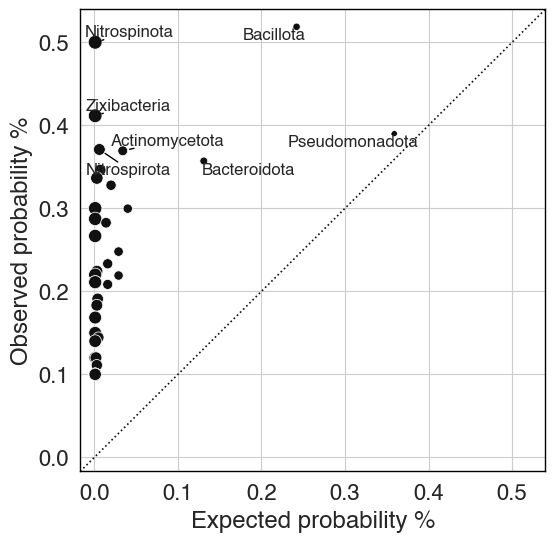

In [17]:
overall_df['log_likelihood_ratio'] = np.log10(overall_df['likelihood_ratio'])

f, ax = plt.subplots(1, 1, figsize=(6, 6))

sns.scatterplot(
    x='null_probability', 
    y='probability', 
    data=overall_df, 
    ax=ax,
    color='#111111',
    size='log_likelihood_ratio',
    sizes=(20, 100),
    legend=False,
)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

x = np.arange(-1, 1, 0.1)
ax.plot(x, x, ':', color='#111111')

ax.set_xlim(xlim[0], ylim[1]);
ax.set_ylim(xlim[0], ylim[1]);

# Annotate the top few points
annotate_top_n = 7
texts = []
for i, (phylum, row) in enumerate(overall_df.iterrows()):
    if (i+1) > annotate_top_n:
        break

    text = ax.text(
        row['null_probability'], 
        row['probability'], 
        phylum, 
        fontsize=12, 
        ha='center',
        va='center',
    )
    texts.append(text)

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=1.0, shrinkA=0, shrinkB=5));

ax.set_xlabel('Expected probability %');
ax.set_ylabel('Observed probability %');

for spine in ax.spines.values():
    spine.set_edgecolor('black')

f.savefig(figures_folder / 'figureS2' / 'phylum_enrichment.pdf', dpi=300, bbox_inches='tight', transparent=True);